In [61]:
# import libraries
import numpy as np
import scipy
from scipy import signal
import math
import matplotlib.pyplot as plt


%matplotlib inline

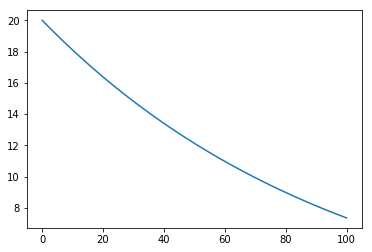

In [62]:
# feature_depth, 1D array, shape = (n, )
feature_depth = np.arange(0, 101, 1)
# print(feature_depth)

# feature_temperature, 1D array, , shape = (n, )
feature_temperature = 20*np.exp((-feature_depth/np.max(feature_depth)))
# print(feature_temperature)

# define feature windows, 2D array, shape = (n, 2)
feature_window = np.vstack((feature_depth, feature_temperature)).T
feature_window.shape
# print(feature_window)

plt.plot(feature_depth, feature_temperature)

(1001, 2)

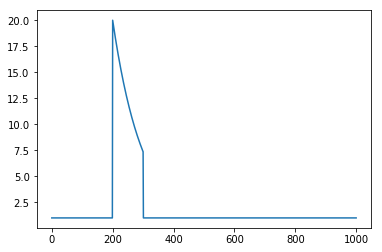

In [63]:
# read in real profile data
data_depth = np.arange(0,1001,1)
data_temperature = np.ones(1001)
# print(data_depth[20:23])
# print((data_depth[300] - data_depth[200]))
data_temperature[200:301] = 20*np.exp((-(data_depth[200:301]-data_depth[200])/(data_depth[300] - data_depth[200])))

plt.plot(data_depth, data_temperature)

data_profile = np.vstack((data_depth, data_temperature)).T
data_profile.shape

In [71]:
# run cross-correlation between feature_window and data, using scipy.signal.convolve()

# step_size = 1

# correlation = scipy.signal.correlate()
filtered_temperature = signal.convolve(data_temperature, feature_temperature, mode='same') / sum(feature_temperature)
filtered_temperature.shape
# plt.plot(data_depth, filtered_temperature)


(1001,)

In [72]:
np.where(filtered_temperature == np.max(filtered_temperature))

(array([244], dtype=int64),)

In [73]:
# run cross-correlation between feature_window and data, using scipy.signal.fftconvolve()

# step_size = 1

filtered_temperature = signal.fftconvolve(data_temperature, feature_temperature, mode='same') / sum(feature_temperature)
filtered_temperature.shape
# plt.plot(data_depth, filtered_temperature)


(1001,)

C:\Users\danie\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


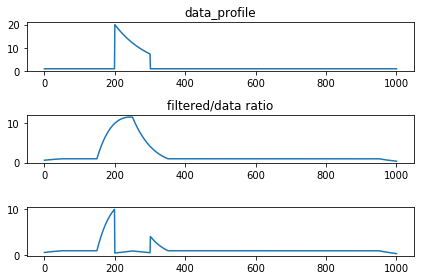

In [74]:
fig, (ax_data, ax_filtered, ax_ratio) = plt.subplots(3, 1)
ax_data.plot(data_temperature)
ax_data.set_title('data_profile')
ax_filtered.plot(filtered_temperature)
ax_filtered.set_title('filtered_profile')
ax_ratio.plot(filtered_temperature/data_temperature)
ax_filtered.set_title('filtered/data ratio')
fig.tight_layout()
fig.show()